In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Du_lieu/SoLieu.csv')

In [3]:
df.columns

Index(['STT', 'GioiTinh', 'Tuoi', 'KhuVuc', 'ThuNhap'], dtype='object')

c.Trong số nữ được điều tra, hãy tính tỉ lệ nữ sống ở thành phố và miền núi.

In [4]:
ti_le = pd.crosstab(df.GioiTinh, df.KhuVuc, normalize = 'index')
ti_le
#Trong nữ, tỷ lệ sống ở thành phố là 0.355556 và miền núi 0.288889

KhuVuc,HaiDao,MienNui,NongThon,ThanhPho
GioiTinh,,,,
Nam,0.109091,0.236364,0.181818,0.472727
Nu,0.133333,0.288889,0.222222,0.355556


d. Tiến hành phân tổ cột dữ liệu về tuổi thành các tổ với các điểm chia là 20, 30, 40, 50, 60, 70, 80
và tính tỉ lệ những người được điều tra có độ tuổi không vượt quá 50.

In [18]:
df.Tuoi.min()

24

In [19]:
df.Tuoi.max()

78

In [7]:
phan_tuoi = pd.cut(df.Tuoi, bins = [20, 30, 40, 50, 60, 70, 80])
phan_tuoi.value_counts()

(30, 40]    41
(20, 30]    20
(60, 70]    13
(40, 50]    12
(50, 60]    12
(70, 80]     2
Name: Tuoi, dtype: int64

In [17]:
result = (df[df.Tuoi <= 50].shape[0])/ df.shape[0]
print('tỉ lệ những người được điều tra có độ tuổi không vượt quá 50:', result)

tỉ lệ những người được điều tra có độ tuổi không vượt quá 50: 0.73


e. Tiến hành phân tổ cột dữ liệu về thu nhập thành các tổ với các điểm chia là
20, 30, 40, 50, 60, 70, 80, 90, 100 và cho nhận xét

In [21]:
df.ThuNhap.min()

20

In [22]:
df.ThuNhap.max()

100

In [24]:
phan_tn = pd.cut(df.ThuNhap, bins = [20, 30, 40, 50, 60, 70, 80, 90, 100])
phan_tn.value_counts() # thieu 20 o to dau

(40, 50]     30
(20, 30]     28
(30, 40]     10
(70, 80]      9
(90, 100]     6
(60, 70]      5
(50, 60]      2
(80, 90]      1
Name: ThuNhap, dtype: int64

In [25]:
phan_tuoi = pd.cut(df.Tuoi, bins = [20, 30, 40, 50, 60, 70, 80, 90, 100], include_lowest = True)
phan_tuoi.value_counts()

(30.0, 40.0]      41
(19.999, 30.0]    20
(60.0, 70.0]      13
(40.0, 50.0]      12
(50.0, 60.0]      12
(70.0, 80.0]       2
(80.0, 90.0]       0
(90.0, 100.0]      0
Name: Tuoi, dtype: int64

In [ ]:
# Biểu đồ:
# Phân loại:
# Định tính: thanh, tròn
# Định lượng: Phân phối tần số(histogram: dữ liệu lớn), thân và lá (dữ liệu nhỏ), biểu đồ hộp
# Đưa ra biểu đồ thích hợp cho từng cột dữ liệu trong file SoLieu.csv

In [26]:
bai9 = pd.read_csv("SoLieu.csv")
bai9.head()

,STT,GioiTinh,Tuoi,KhuVuc,ThuNhap
0,1,Nam,30,NongThon,30
1,2,Nu,27,ThanhPho,40
2,3,Nu,32,MienNui,25
3,4,Nam,31,NongThon,35
4,5,Nu,41,HaiDao,42


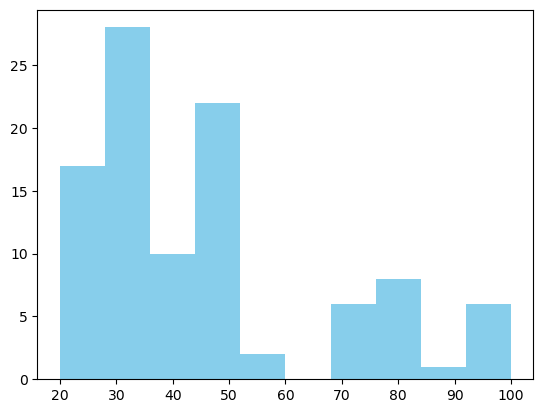

-> Phân phối thu nhập lệch phải, không đối xứng


In [30]:
import matplotlib.pyplot as plt
plt.hist(df.ThuNhap, color = "skyblue")
plt.show()
print("-> Phân phối thu nhập lệch phải, không đối xứng")

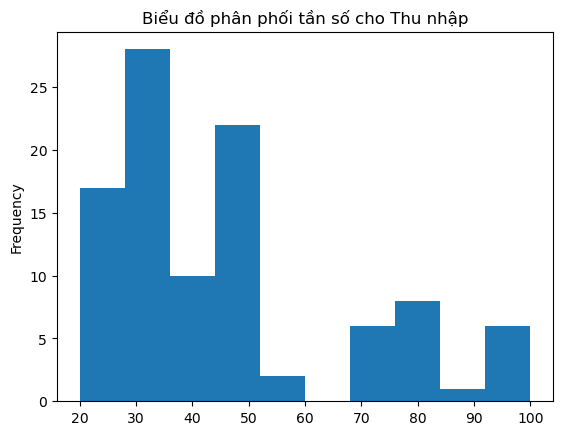

In [31]:
df.ThuNhap.plot(kind='hist', title='Biểu đồ phân phối tần số cho Thu nhập');

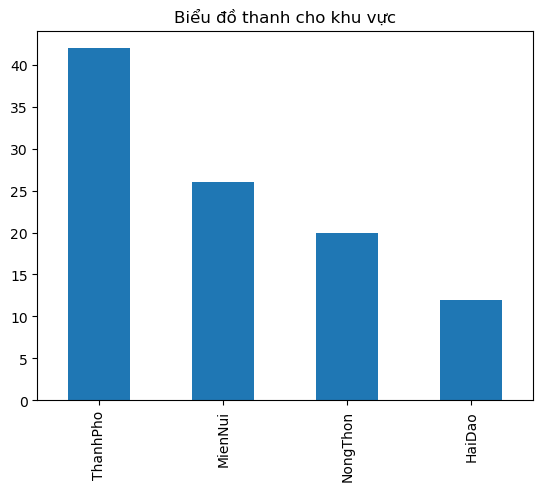

In [32]:
#g. Vẽ biểu đồ thanh minh họa phân phối tần số của khu vực sống và đưa ra nhận xét.
df.KhuVuc.value_counts().plot(kind='bar', title='Biểu đồ thanh cho khu vực');

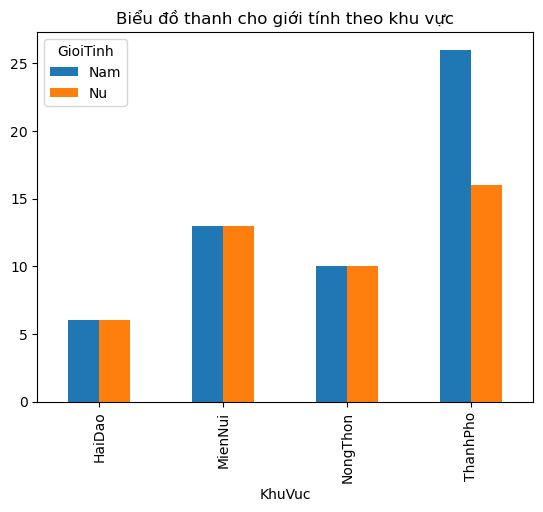

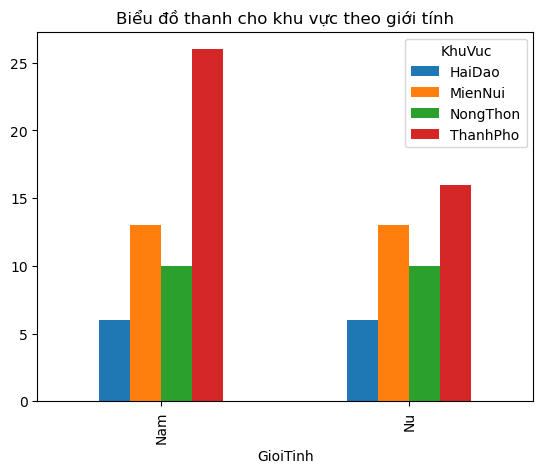

In [35]:
#Biểu đồ thanh cho giới tính theo khu vực
gt_kv = pd.crosstab(df.KhuVuc, df.GioiTinh)
gt_kv.plot(kind='bar', title='Biểu đồ thanh cho giới tính theo khu vực');

#Biểu đồ thanh cho giới tính theo khu vực
gt_kv = pd.crosstab(df.GioiTinh, df.KhuVuc)
gt_kv.plot(kind='bar', title='Biểu đồ thanh cho khu vực theo giới tính');

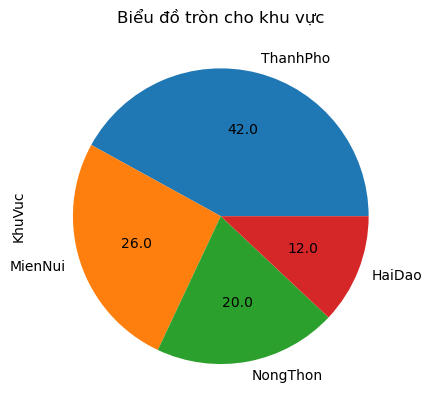

In [38]:
#i. Biểu đồ tròn cho Khu vực
df.KhuVuc.value_counts().plot(kind='pie', autopct='%0.1f', title='Biểu đồ tròn cho khu vực');

<AxesSubplot:>

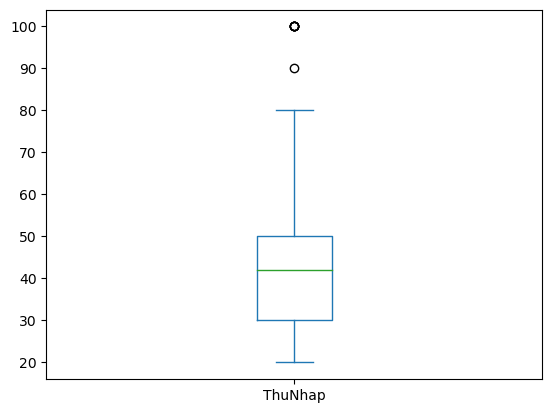

In [40]:
#Vẽ biểu đồ hộp cho cột thu nhập và nhận xét
df.ThuNhap.plot(kind='box')
#thong tin
# - Q1 = 30, Q2=42, Q3=50
# - Tập giá trị có giá trị ngoại biên bên phải
# - Phân phối thu nhập không đối xứng, lệch phải
# Biểu đồ hộp giúp vẽ được nhiều biểu đồ trên một hình, --> so sánh phân phối nhiều tập dữ liệu

In [41]:
#Tính tứ phân vị của thu nhập và nhận xét
df.ThuNhap.describe()

count    100.000000
mean      45.820000
std       22.221284
min       20.000000
25%       30.000000
50%       42.000000
75%       50.000000
max      100.000000
Name: ThuNhap, dtype: float64

In [ ]:
# Q1 = 30: Khoảng 30% số quan sát không vượt quá 30
# Q2 = 42: Khoảng 50% số quan sát không vượt quá 42
# Q3 = 50: Khoảng 75% số quan sát không vượt quá 50

In [42]:
# Thu nhập thấp nhất trong nhóm 10% có thu nhập cao nhất là 80
df.ThuNhap.quantile(0.9)

80.0

In [43]:
data = pd.read_csv('hostel.csv')
data

,Unnamed: 0.1,Unnamed: 0,hostel_name,City,price_from,Distance,summary_score,rating_band,atmosphere,cleanliness,facilities,location_y,security,staff,valueformoney,lon,lat
0,0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
2,3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
3,4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
4,5,6,1night1980hostel Tokyo,Tokyo,2100,9.4km from city centre,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,337,338,YADOYA Guesthouse Green,Tokyo,2300,2.6km from city centre,8.2,Fabulous,7.9,7.7,6.9,8.9,8.9,8.8,8.3,139.668125,35.702908
294,338,339,YADOYA Guesthouse Orange,Tokyo,2000,2.9km from city centre,8.9,Fabulous,8.6,9.0,7.8,9.4,9.0,9.2,9.4,139.667695,35.706513
295,339,340,YAWP! backpackers,Tokyo,2500,17.5km from city centre,9.3,Superb,9.5,9.3,9.4,8.5,9.5,9.2,9.6,139.869197,35.752885
296,340,341,You En Me House,Kyoto,2800,2.4km from city centre,8.0,Fabulous,7.3,8.0,6.7,8.0,8.7,10.0,7.3,135.749063,34.997376


c. Tính tỷ lệ được đánh giá rating_band là Superb trong từng thành phố và cho
nhận xét.

In [44]:
rate = data['rating_band']
rate_superb = data[data['rating_band']=='Superb']
rate_superb.shape[0]/len(rate)

0.5771812080536913

In [46]:
rt_sp = pd.crosstab(data.rating_band,data.City,normalize='columns')
rt_sp

City,Fukuoka-City,Hiroshima,Kyoto,Osaka,Tokyo
rating_band,,,,,
Fabulous,0.428571,0.230769,0.257576,0.337079,0.336207
Good,0.000000,0.000000,0.030303,0.044944,0.008621
Rating,0.000000,0.000000,0.030303,0.033708,0.008621
Superb,0.571429,0.769231,0.651515,0.528090,0.551724
Very Good,0.000000,0.000000,0.030303,0.056180,0.094828


d. Biến giá nhà trọ (price_from) có giá trị ngoại biên không? Bạn chọn phân tổ đều hay không đều khi phân dữ liệu giá nhà thành các tổ. Phân tổ dữ liệu giá nhà theo cách lựa chọn của bạn

<AxesSubplot:>

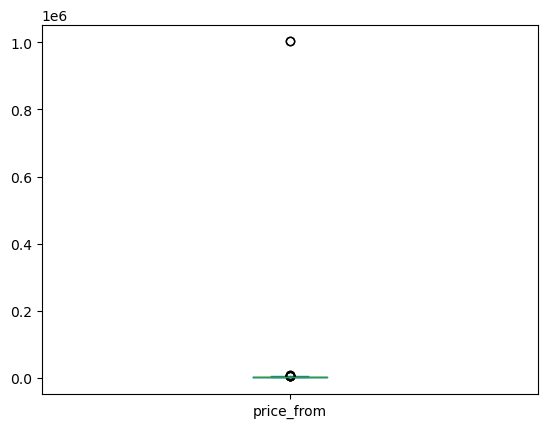

In [47]:
data.price_from.plot(kind='box')

In [49]:
min = data.price_from.min()
max = data.price_from.max()
print(min)
print(max)


1000
1003200


Nên Phân tổ không đều trong tập dữ liệu này

In [ ]:
pt_price = pd.cut(df.price_from, bins=[20, 30, 40, 50, 60, 70, 80, 90, 100])
print(chia_tn1.value_counts()) 